In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')

data1 = pd.read_csv("./archive/peugeot_207_01.csv", delimiter=';')
data2 = pd.read_csv("./archive/peugeot_207_02.csv", delimiter=';')
data3 = pd.read_csv("./archive/opel_corsa_01.csv", delimiter=';')
data4 = pd.read_csv("./archive/opel_corsa_02.csv", delimiter=';')

def fix_df(df):
    fixed_df = df.drop(["EngineLoad", "EngineCoolantTemperature","EngineRPM", "ManifoldAbsolutePressure","AltitudeVariation", "VehicleSpeedVariation", "VehicleSpeedVariance", "VehicleSpeedAverage", "FuelConsumptionAverage","MassAirFlow","IntakeAirTemperature","traffic","drivingStyle"], axis=1)
    fixed_df = fixed_df.rename(columns={
        'VehicleSpeedInstantaneous': 'speed', 
        'VerticalAcceleration': 'vacceleration', 
        'LongitudinalAcceleration': 'lacceleration',
        'roadSurface': 'surface'
    })
    
    for column in fixed_df.columns:
        if column == 'surface': 
            fixed_df[column] = fixed_df[column].replace(to_replace='SmoothCondition', value='smooth')
            fixed_df[column] = fixed_df[column].replace(to_replace='UnevenCondition', value='uneven')
            fixed_df[column] = fixed_df[column].replace(to_replace='FullOfHolesCondition', value='with_holes')
        else:
            fixed_df[column] = pd.to_numeric(fixed_df[column].str.replace(",", "."))
    
    return fixed_df

data1 = fix_df(data1)
data2 = fix_df(data2)
data3 = fix_df(data3)
data4 = fix_df(data4)

#data4 = data4[data4.vacceleration < 1.5].reset_index().drop('index', axis=1)
data4.describe()

,speed,lacceleration,vacceleration
count,4320.000000,4328.000000,4328.000000
mean,41.626711,1.590308,4.030149
std,37.410495,3.045528,7.189366
min,0.000000,-1.710800,-1.140000
25%,9.457560,-0.262900,-0.007800
50%,30.624477,0.109000,0.215000
75%,67.553993,1.050000,0.708000
max,122.723091,8.477800,17.944800


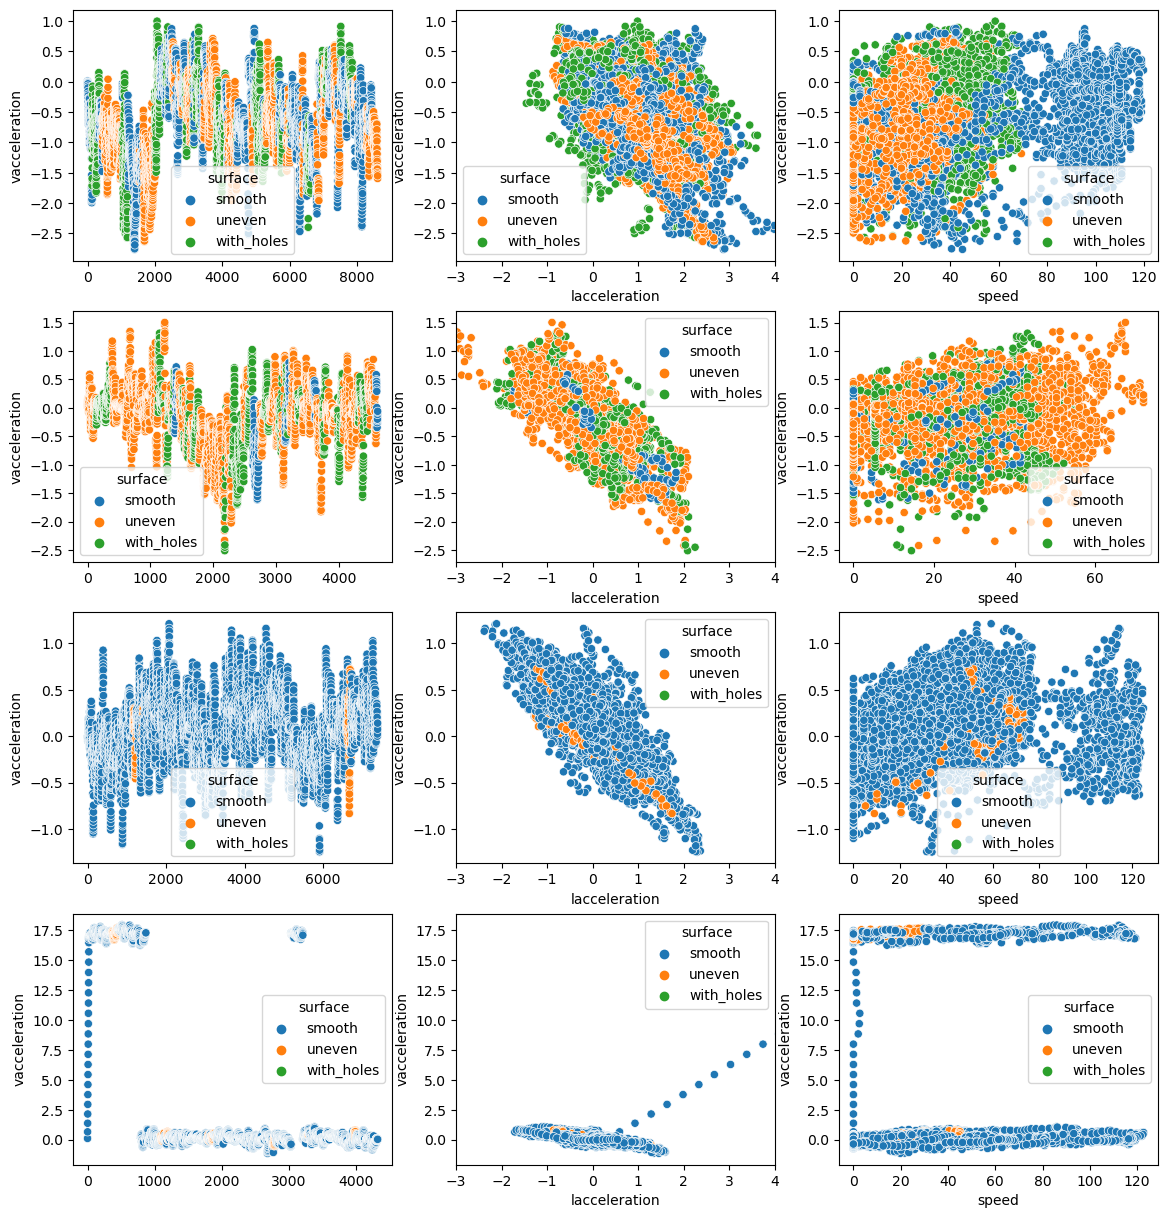

In [2]:
_, axs = plt.subplots(4, 3, figsize=(14, 15))

hue_order = ['smooth', 'uneven', 'with_holes']
sns.scatterplot(data=data1, x=data1.index, y='vacceleration', hue='surface', ax=axs[0,0], hue_order=hue_order)
sns.scatterplot(data=data1, x='lacceleration', y='vacceleration', hue='surface', ax=axs[0,1], hue_order=hue_order)
axs[0,1].set_xlim(-3, 4)
sns.scatterplot(data=data1, x='speed', y='vacceleration', hue='surface', ax=axs[0,2], hue_order=hue_order)

sns.scatterplot(data=data2, x=data2.index, y='vacceleration', hue='surface', ax=axs[1,0], hue_order=hue_order)
sns.scatterplot(data=data2, x='lacceleration', y='vacceleration', hue='surface', ax=axs[1,1], hue_order=hue_order)
axs[1,1].set_xlim(-3, 4)
sns.scatterplot(data=data2, x='speed', y='vacceleration', hue='surface', ax=axs[1,2], hue_order=hue_order)

sns.scatterplot(data=data3, x=data3.index, y='vacceleration', hue='surface', ax=axs[2,0], hue_order=hue_order)
sns.scatterplot(data=data3, x='lacceleration', y='vacceleration', hue='surface', ax=axs[2,1], hue_order=hue_order)
axs[2,1].set_xlim(-3, 4)
sns.scatterplot(data=data3, x='speed', y='vacceleration', hue='surface', ax=axs[2,2], hue_order=hue_order)

sns.scatterplot(data=data4, x=data4.index, y='vacceleration', hue='surface', ax=axs[3,0], hue_order=hue_order)
sns.scatterplot(data=data4, x='lacceleration', y='vacceleration', hue='surface', ax=axs[3,1], hue_order=hue_order)
axs[3,1].set_xlim(-3, 4)
sns.scatterplot(data=data4, x='speed', y='vacceleration', hue='surface', ax=axs[3,2], hue_order=hue_order)

plt.show()

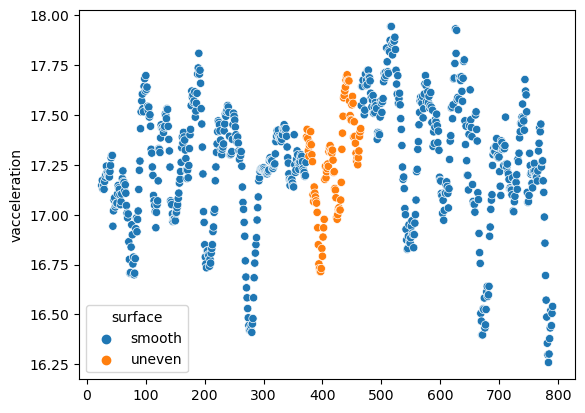

In [3]:
sns.scatterplot(data=data4[25:792], x=data4.index[25:792], y='vacceleration', hue='surface')
plt.show()

In [4]:
first_part_to_fix = data4[25:792].copy()
first_part_to_fix.vacceleration = data4[25:792].vacceleration - data4[25:792].vacceleration.mean()
first_part_to_fix.lacceleration = data4[25:792].lacceleration - data4[25:792].lacceleration.mean()
first_part_to_fix

,speed,lacceleration,vacceleration,surface
25,0.000000,-0.097326,-0.104775,smooth
26,1.801440,-0.107326,-0.078575,smooth
27,3.152520,0.053974,-0.121975,smooth
28,1.801440,0.074474,-0.107875,smooth
29,0.450360,0.129774,-0.123975,smooth
...,...,...,...,...
787,18.689940,0.536274,-0.819275,smooth
788,20.941738,0.508974,-0.730775,smooth
789,21.166918,0.477774,-0.807875,smooth
790,24.994980,0.583074,-0.746175,smooth


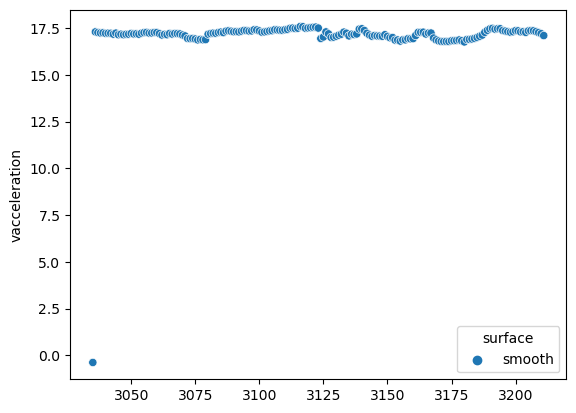

In [5]:
sns.scatterplot(data=data4[3035:3212], x=data4[3035:3212].index, y='vacceleration', hue='surface')
plt.show()

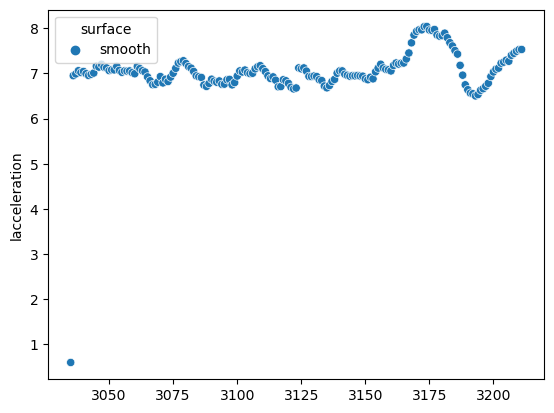

In [6]:
sns.scatterplot(data=data4[3035:3212], x=data4[3035:3212].index, y='lacceleration', hue='surface')
plt.show()

In [7]:
second_part_to_fix = data4[3036:3212].copy()
second_part_to_fix.vacceleration = data4[3036:3212].vacceleration - data4[3036:3212].vacceleration.mean()
second_part_to_fix.lacceleration = data4[3036:3212].lacceleration - data4[3036:3212].lacceleration.mean()
second_part_to_fix.describe()

,speed,lacceleration,vacceleration
count,176.000000,1.760000e+02,1.760000e+02
mean,49.465391,-7.620167e-16,7.872491e-15
std,43.646050,3.280718e-01,1.997660e-01
min,0.000000,-5.734875e-01,-4.319937e-01
25%,11.653064,-2.071625e-01,-1.251437e-01
50%,28.823040,-5.333750e-02,3.105625e-02
75%,81.515156,8.218750e-02,1.470063e-01
max,119.345398,9.650125e-01,3.938063e-01


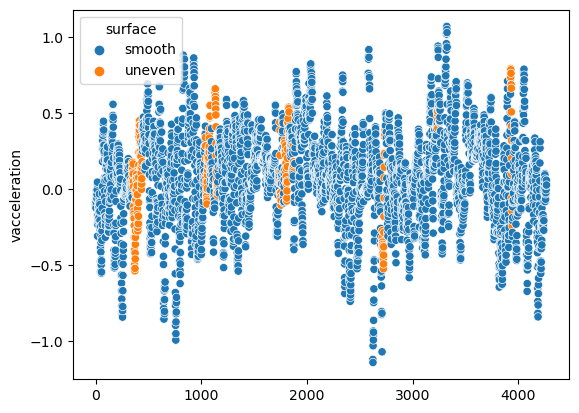

In [8]:
first_normal = data4[792:3036]
second_normal = data4[3212:]

data4 = pd.DataFrame(
    pd.concat([first_part_to_fix, first_normal, second_part_to_fix, second_normal]), 
    columns=data1.columns
)

data4 = data4[data4.vacceleration < 5].reset_index().drop('index', axis=1)

sns.scatterplot(data=data4, x=data4.index, y='vacceleration', hue='surface')
plt.show()

In [9]:
filtered_data1 = pd.DataFrame(columns=['vacceleration', 'lacceleration', 'surface', 'speed'])
filtered_data2 = pd.DataFrame(columns=['vacceleration', 'lacceleration', 'surface', 'speed'])
filtered_data3 = pd.DataFrame(columns=['vacceleration', 'lacceleration', 'surface', 'speed'])
filtered_data4 = pd.DataFrame(columns=['vacceleration', 'lacceleration', 'surface', 'speed'])

for df, d in [(filtered_data1, data1), (filtered_data2, data2), (filtered_data3, data3), (filtered_data4, data4)]:
    df.surface = d.surface.copy()
    df.vacceleration = d.vacceleration.rolling(window=30, min_periods=0).mean()#data1.vacceleration.rolling(window=7, min_periods=0).mean()
    df.lacceleration = d.lacceleration.rolling(window=30, min_periods=0).mean()
    df.speed = d.speed.copy()
    
def split_data_in_windows(L, data):
    windowed_data = []
    window = 0
    N = len(data) // L
    for i in range(0, N):
        windowed_data.append(data[window:window+L])
        window += (L // 2)

    print(len(windowed_data))
    return windowed_data

L = 6
windowed_data1 = split_data_in_windows(L, filtered_data1)
windowed_data2 = split_data_in_windows(L, filtered_data2)
windowed_data3 = split_data_in_windows(L, filtered_data3)
windowed_data4 = split_data_in_windows(L, filtered_data4)

1435
770
1232
711


In [10]:
import math

def set_surface(surf):
    return surf.value_counts().idxmax()

def extract_on_movement_windows(data):
    return list(filter(lambda window: len(window[window.speed < 1]) > 0, data))
    
def extract_features_in_windows(data):
    features = {
        "vw_mean": [],
        "vw_median": [],
        "vw_std": [],
        "vw_sum": [],
        "vw_min": [],
        "vw_max": [],
        "vw_rms": [],
        "vw_skew": [],
        "lw_mean": [],
        "lw_median": [],
        "lw_std": [],
        "lw_sum": [],
        "lw_min": [],
        "lw_max": [],
        "lw_rms": [],
        "lw_skew": [],
        "surface": [],
    }

    for window in data:
        vwmean = window.lacceleration.mean()
        features["vw_mean"].append(vwmean)

        vwmedian = window.vacceleration.median()
        features["vw_median"].append(vwmedian)

        features["vw_std"].append(window.vacceleration.std())

        features["vw_sum"].append(window.vacceleration.sum())
        features["vw_min"].append(window.vacceleration.min())
        features["vw_max"].append(window.vacceleration.max())
        vwrms = math.sqrt((window.vacceleration**2).mean())
        features["vw_rms"].append(vwrms)

        vw_skew = (window.vacceleration**3).sum() / L * (vwrms * 3)
        features["vw_skew"].append(vw_skew)

        lwmean = window.lacceleration.mean()
        features["lw_mean"].append(lwmean)

        lwmedian = window.lacceleration.median()
        features["lw_median"].append(lwmedian)

        features["lw_std"].append(window.lacceleration.std())

        features["lw_sum"].append(window.lacceleration.sum())
        features["lw_min"].append(window.lacceleration.min())
        features["lw_max"].append(window.lacceleration.max())
        lwrms = math.sqrt((window.lacceleration**2).mean())
        features["lw_rms"].append(lwrms)

        lw_skew = (window.lacceleration**3).sum() / L * (lwrms * 3)
        features["lw_skew"].append(lw_skew)

        features["surface"].append(set_surface(window.surface))

        
    return pd.DataFrame(features)

features1 = extract_features_in_windows(extract_on_movement_windows(windowed_data1))
features2 = extract_features_in_windows(extract_on_movement_windows(windowed_data2))
features3 = extract_features_in_windows(extract_on_movement_windows(windowed_data3))
features4 = extract_features_in_windows(extract_on_movement_windows(windowed_data4))

features = pd.concat([features1, features2, features3, features4], axis=0
                    ).reset_index().drop('index', axis=1)

features = features.groupby('surface')
features = features.apply(lambda x: x.sample(features.size().min(), random_state=100).reset_index(drop=True))
features = features.droplevel('surface')

features.surface.value_counts()

smooth        157
uneven        157
with_holes    157
Name: surface, dtype: int64

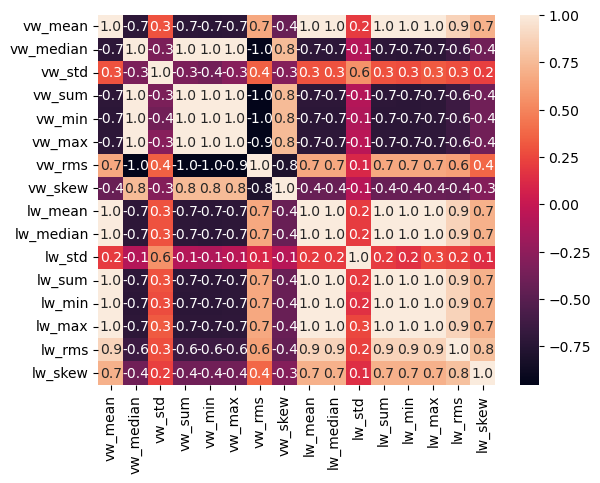

In [11]:
sns.heatmap(data=features.corr(), annot=True, fmt='.1f')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

using_features = list(filter(lambda x: x != 'surface', features.columns))
X = features[using_features]
Y = features['surface']

scaler = StandardScaler()
X = scaler.fit_transform(X)

lr_clf = LogisticRegression(max_iter=1000)
svm_clf = SVC()
rf_clf = RandomForestClassifier()
dt_clf = DecisionTreeClassifier()
xg_clf = XGBClassifier(objective='multi:softmax')

svm_scores = cross_val_score(svm_clf, X, Y, cv=10)
lr_scores = cross_val_score(lr_clf, X, Y, cv=10)
rf_scores = cross_val_score(rf_clf, X, Y, cv=10)
dt_scores = cross_val_score(dt_clf, X, Y, cv=10)
xg_scores = cross_val_score(xg_clf, X, Y, cv=10)

print("SVM: mean = ", svm_scores.mean(), " median = ", np.median(svm_scores))
print("Logistic Regression: mean = ", lr_scores.mean(), " median = ", np.median(lr_scores))
print("Random Forest: mean = ", rf_scores.mean(), " median = ", np.median(rf_scores))
print("Decision Tree: mean = ", dt_scores.mean(), " median = ", np.median(dt_scores))
print("XGBoost: mean = ", xg_scores.mean(), " median = ", np.median(xg_scores))

#print("SVM: mean = ", svm_scores)
#print("Logistic Regression: mean = ", lr_scores)
#print("Random Forest: mean = ", rf_scores)
#print("Decision Tree: mean = ", dt_scores)
#print("XGBoost: mean = ", xg_scores)

/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:30] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:31] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:31] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:32] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:32] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:33] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:33] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:34] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:34] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:35] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
SVM: mean =  0.7198138297872341  median =  0.7127659574468086
Logistic Regression: mean =  0.666799645390071  median =  0.6702127659574468
Random Forest: mean =  0.772872340425532  median =  0.7579787234042553
Decision Tree: mean =  0.6858156028368795  median =  0.6737588652482269
XGBoost: mean =  0.7602393617021277  median =  0.7659574468085106


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=100)

xgb = XGBClassifier(objective='multi:softmax')
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)
print(accuracy_score(y_test, predictions))

cm_xgb = confusion_matrix(y_test, predictions, labels=model.classes_)
tp1, fp1, fp2, fp3, tp2, fp4, fp5, fp6, tp3 = cm_xgb.ravel()
res = (tp1 + tp2 + tp3) / (tp1 + fp1 + fp2 +  fp3 + tp2 + fp4 + fp5 + fp6 + tp3)

print(res)

#cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
#cm_plot.plot()

/home/matheusandrade/src/lib/anaconda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:05:58] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7033898305084746
0.7033898305084746


In [19]:
tp1, fp1, fp2, fp3, tp2, fp4, fp5, fp6, tp3 = cm.ravel()
tp1 + tp2 + tp3

83

In [17]:
cm.ravel()

array([32,  7,  2,  5, 20,  7,  2, 12, 31])